In [1]:
#importing required packages
import pandas as pd
import numpy as np
from pprint import pprint
import os
import random
import scipy as sp
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [52]:
# reading flights data
flights = pd.read_csv('data/flights.csv')
print(flights.shape)
flights.head(5)

C:\Users\npula\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(5819079, 31)


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
YEAR                   int64
MONTH                  int64
DAY                    int64
DAY_OF_WEEK            int64
AIRLINE                object
FLIGHT_NUMBER          int64
TAIL_NUMBER            object
ORIGIN_AIRPORT         object
DESTINATION_AIRPORT    object
SCHEDULED_DEPARTURE    int64
DEPARTURE_TIME         float64
DEPARTURE_DELAY        float64
TAXI_OUT               float64
WHEELS_OFF             float64
SCHEDULED_TIME         float64
ELAPSED_TIME           float64
AIR_TIME               float64
DISTANCE               int64
WHEELS_ON              float64
TAXI_IN                float64
SCHEDULED_ARRIVAL      int64
ARRIVAL_TIME           float64
ARRIVAL_DELAY          float64
DIVERTED               int64
CANCELLED              int64
CANCELLATION_REASON    object
AIR_SYSTEM_DELAY       float64
SECURITY_DELAY         float64
AIRLINE_DELAY          float64
LATE_AIRCRAFT

In [4]:
flights.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,5819079.0,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.732926e+06,5.732926e+06,5.730032e+06,5.730032e+06,...,5.819079e+06,5.726566e+06,5.714008e+06,5.819079e+06,5.819079e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06
mean,2015.0,6.524085e+00,1.570459e+01,3.926941e+00,2.173093e+03,1.329602e+03,1.335204e+03,9.370158e+00,1.607166e+01,1.357171e+03,...,1.493808e+03,1.476491e+03,4.407057e+00,2.609863e-03,1.544643e-02,1.348057e+01,7.615387e-02,1.896955e+01,2.347284e+01,2.915290e+00
std,0.0,3.405137e+00,8.783425e+00,1.988845e+00,1.757064e+03,4.837518e+02,4.964233e+02,3.708094e+01,8.895574e+00,4.980094e+02,...,5.071647e+02,5.263197e+02,3.927130e+01,5.102012e-02,1.233201e-01,2.800368e+01,2.143460e+00,4.816164e+01,4.319702e+01,2.043334e+01
min,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.200000e+01,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,-8.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2015.0,4.000000e+00,8.000000e+00,2.000000e+00,7.300000e+02,9.170000e+02,9.210000e+02,-5.000000e+00,1.100000e+01,9.350000e+02,...,1.110000e+03,1.059000e+03,-1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2015.0,7.000000e+00,1.600000e+01,4.000000e+00,1.690000e+03,1.325000e+03,1.330000e+03,-2.000000e+00,1.400000e+01,1.343000e+03,...,1.520000e+03,1.512000e+03,-5.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00
75%,2015.0,9.000000e+00,2.300000e+01,6.000000e+00,3.230000e+03,1.730000e+03,1.740000e+03,7.000000e+00,1.900000e+01,1.754000e+03,...,1.918000e+03,1.917000e+03,8.000000e+00,0.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,1.900000e+01,2.900000e+01,0.000000e+00
max,2015.0,1.200000e+01,3.100000e+01,7.000000e+00,9.855000e+03,2.359000e+03,2.400000e+03,1.988000e+03,2.250000e+02,2.400000e+03,...,2.400000e+03,2.400000e+03,1.971000e+03,1.000000e+00,1.000000e+00,1.134000e+03,5.730000e+02,1.971000e+03,1.331000e+03,1.211000e+03


In [5]:
flights.describe(include=np.object)

,AIRLINE,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,CANCELLATION_REASON
count,5819079,5804358,5819079,5819079,89884
unique,14,4897,930,930,4
top,WN,N480HA,ATL,ATL,B
freq,1261855,3768,346836,346904,48851


In [6]:
#reading airports data
airports = pd.read_csv('data/airports.csv')
print(airports.shape)
airports.head()

(322, 7)


,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [7]:
#reading airlines data and converting into a dictionary
airlines = pd.read_csv('data/airlines.csv')
airlines = {row['IATA_CODE']:row['AIRLINE'] for index,row in airlines.iterrows()}
pprint(airlines)

{'AA': 'American Airlines Inc.',
 'AS': 'Alaska Airlines Inc.',
 'B6': 'JetBlue Airways',
 'DL': 'Delta Air Lines Inc.',
 'EV': 'Atlantic Southeast Airlines',
 'F9': 'Frontier Airlines Inc.',
 'HA': 'Hawaiian Airlines Inc.',
 'MQ': 'American Eagle Airlines Inc.',
 'NK': 'Spirit Air Lines',
 'OO': 'Skywest Airlines Inc.',
 'UA': 'United Air Lines Inc.',
 'US': 'US Airways Inc.',
 'VX': 'Virgin America',
 'WN': 'Southwest Airlines Co.'}


In [8]:
flights['DAY'].nunique()

31

__Analysing overall flights data:__

In [9]:
# finding number of data type of the column, null and unique values in each and every column
for col in flights.columns.values:
    print('Column Name:', col)
    print('Datatype:', flights[col].dtype)
    print("No of Null Values:",flights[col].isnull().sum())
    print("No of Unique Values:%d\n" % flights[col].nunique())

Column Name: YEAR
Datatype: int64
No of Null Values: 0
No of Unique Values:1

Column Name: MONTH
Datatype: int64
No of Null Values: 0
No of Unique Values:12

Column Name: DAY
Datatype: int64
No of Null Values: 0
No of Unique Values:31

Column Name: DAY_OF_WEEK
Datatype: int64
No of Null Values: 0
No of Unique Values:7

Column Name: AIRLINE
Datatype: object
No of Null Values: 0
No of Unique Values:14

Column Name: FLIGHT_NUMBER
Datatype: int64
No of Null Values: 0
No of Unique Values:6952

Column Name: TAIL_NUMBER
Datatype: object
No of Null Values: 14721
No of Unique Values:4897

Column Name: ORIGIN_AIRPORT
Datatype: object
No of Null Values: 0
No of Unique Values:930

Column Name: DESTINATION_AIRPORT
Datatype: object
No of Null Values: 0
No of Unique Values:930

Column Name: SCHEDULED_DEPARTURE
Datatype: int64
No of Null Values: 0
No of Unique Values:1321

Column Name: DEPARTURE_TIME
Datatype: float64
No of Null Values: 86153
No of Unique Values:1440

Column Name: DEPARTURE_DELAY
Data

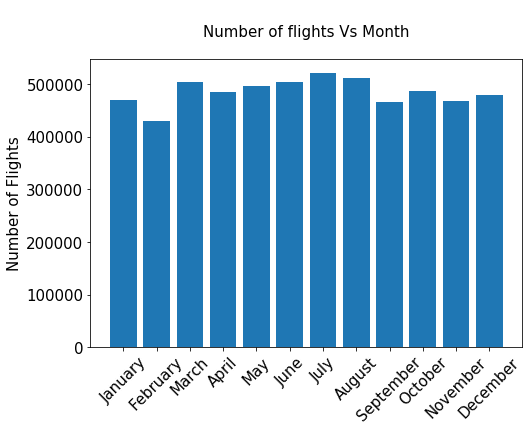

In [10]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
no_flights_month = [len(flights[flights['MONTH'] == month]) for month in flights.MONTH.unique()]
fig = plt.figure()
ax = fig.add_axes([6,6,1,1])
ax.bar(months, no_flights_month)
ax.tick_params(labelsize = 15)
ax.set_ylabel('Number of Flights', fontsize = 15)
#ax.set_xlabel('Months', fontsize = 15)
ax.set_title('\nNumber of flights Vs Month\n', fontsize = 15)
_= plt.xticks(rotation=45)
# Make some labels.
# for rect, label in zip(ax.patches, no_flights_month):
#     height = rect.get_height()
#     ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
#             ha='center', va='bottom', color='black',fontsize = 10)

C:\Users\npula\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys


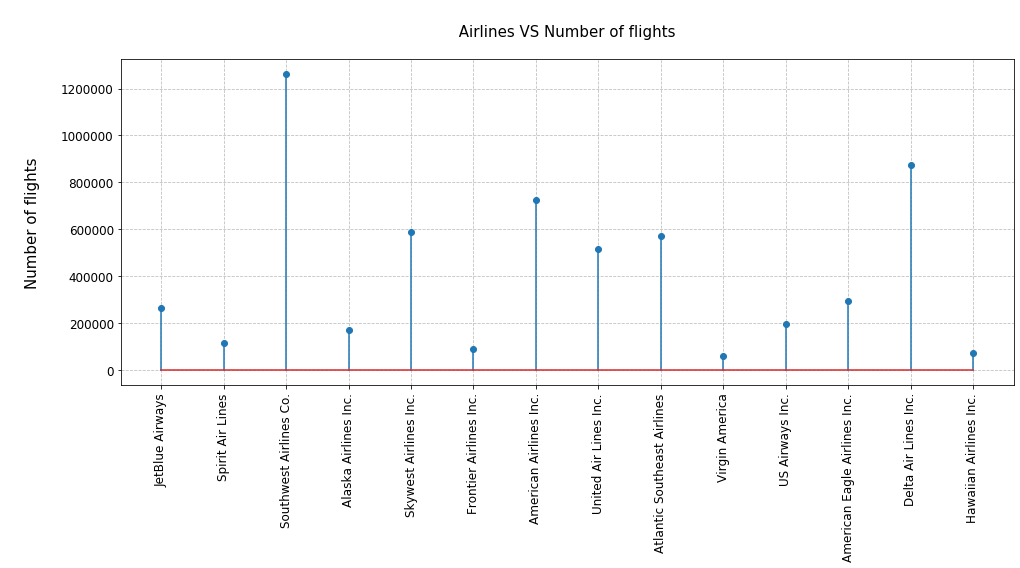

In [11]:
airline_names = []
no_flights = []
for k,v in dict(flights['AIRLINE'].value_counts(sort=False)).items():
    airline_names.append(airlines[k])
    no_flights.append(v)
fig = plt.figure(figsize = (16,6))
_ = plt.stem(airline_names, no_flights)
_ = plt.xticks(rotation=90)
_ = plt.tick_params(labelsize = 12)
_ = plt.title("\n Airlines VS Number of flights \n", fontsize = 15)
_ = plt.ylabel("\nNumber of flights\n", fontsize = 15)
plt.grid(True, linestyle='--', color = '0.75')

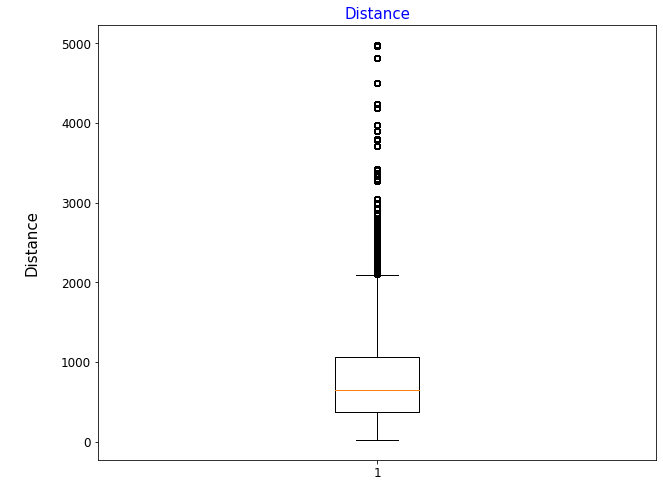

In [12]:
fig = plt.figure(figsize = (10, 8))
_ = plt.boxplot(flights['DISTANCE'].dropna())
plt.tick_params(labelsize = 12)
_ = plt.title('Distance', fontsize = 15, color = 'blue')
_ = plt.ylabel("\nDistance\n", fontsize = 15)

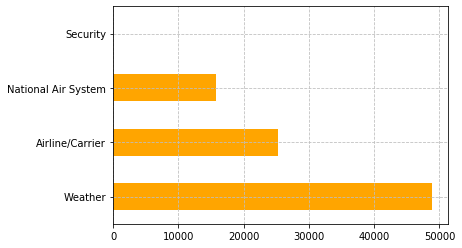

In [13]:
#cancellation Reasons
x = pd.DataFrame(flights['CANCELLATION_REASON'])
x['CANCELLATION_REASON'][x['CANCELLATION_REASON'] == 'A'] = 'Airline/Carrier'
x['CANCELLATION_REASON'][x['CANCELLATION_REASON'] == 'B'] = 'Weather'
x['CANCELLATION_REASON'][x['CANCELLATION_REASON'] == 'C'] = 'National Air System'
x['CANCELLATION_REASON'][x['CANCELLATION_REASON'] == 'D'] = 'Security'
x['CANCELLATION_REASON'].value_counts().plot(kind='barh', color = 'orange')
plt.grid(True, linestyle='--', color = '0.75')

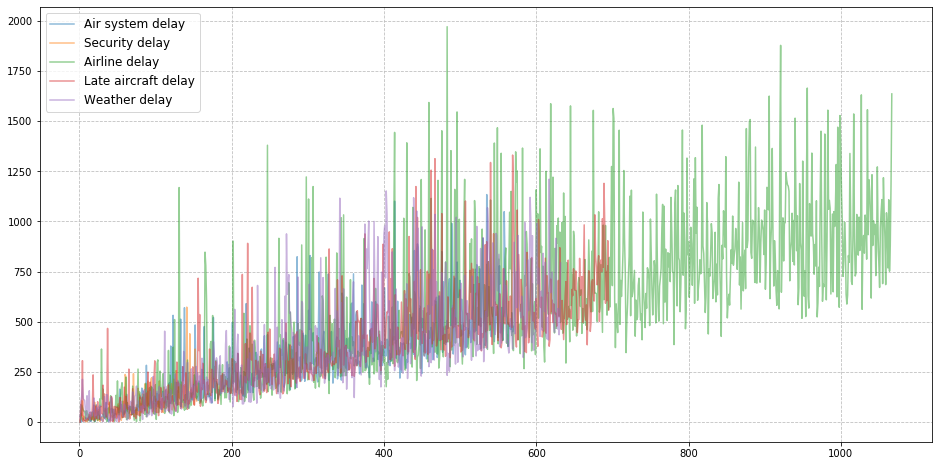

In [14]:
#flights.groupby(['AIRLINE']).mean()
x = flights['AIR_SYSTEM_DELAY'].unique()
y = flights['SECURITY_DELAY'].unique()
z = flights['AIRLINE_DELAY'].unique()
a = flights['LATE_AIRCRAFT_DELAY'].unique()
b = flights['WEATHER_DELAY'].unique()
fig = plt.figure(figsize = (16, 8))
plt.plot(x, alpha = 0.5, label = "Air system delay")
plt.plot(y, alpha = 0.5, label = "Security delay")
plt.plot(z, alpha = 0.5, label = "Airline delay")
plt.plot(a, alpha = 0.5, label = "Late aircraft delay")
plt.plot(b, alpha = 0.5, label = "Weather delay")
plt.legend(fontsize = 12)
plt.grid(True, linestyle='--', color = '0.75')

In [15]:
# removing 10th months data. Since it contains number values in ORIGIN_AIRPORT and DESTINATION_AIRPORT column
flights = flights[flights['MONTH']!=10] 
flights.shape

(5332914, 31)

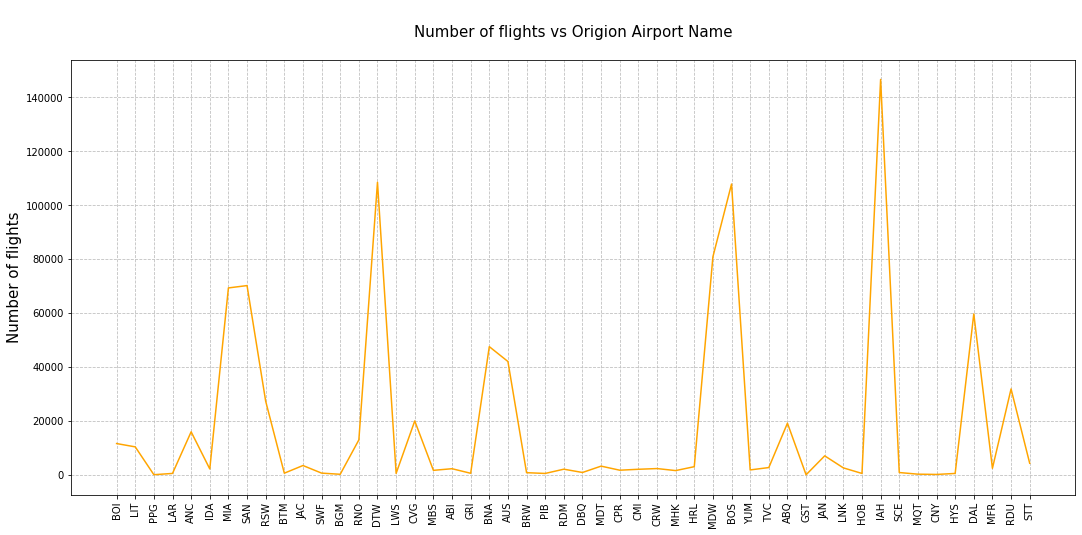

In [16]:
x = dict(flights['ORIGIN_AIRPORT'].value_counts(sort=False)[:50])
fig = plt.figure(figsize = (18,8))
plt.plot(list(x.keys()), list(x.values()), color = 'orange')
plt.xticks(rotation = 90)
plt.ylabel("Number of flights", fontsize = 15)
_ = plt.title('\nNumber of flights vs Origion Airport Name\n', fontsize = 15)
plt.grid(True, linestyle='--', color = '0.75')

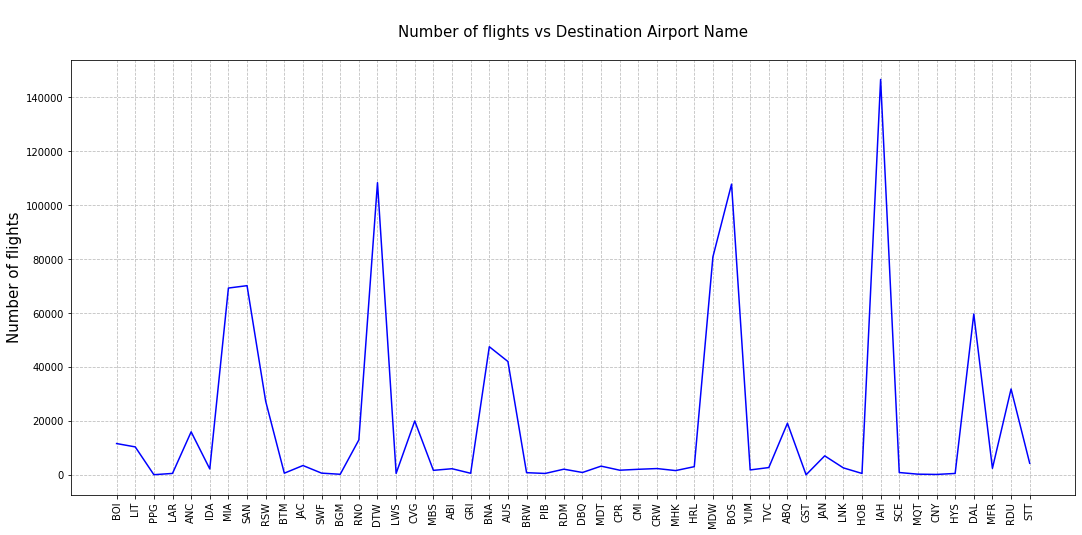

In [17]:
x = dict(flights['DESTINATION_AIRPORT'].value_counts(sort=False)[:50])
fig = plt.figure(figsize = (18,8))
plt.plot(list(x.keys()), list(x.values()), color = 'blue')
plt.xticks(rotation = 90)
plt.ylabel("Number of flights", fontsize = 15)
_ = plt.title('\nNumber of flights vs Destination Airport Name\n', fontsize = 15)
plt.grid(True, linestyle='--', color = '0.75')

In [18]:
#flights[flights["ORIGIN_AIRPORT"] == "ATL"].groupby("AIRLINE")["MONTH"].sum().plot()

Total number of flights:  5332914


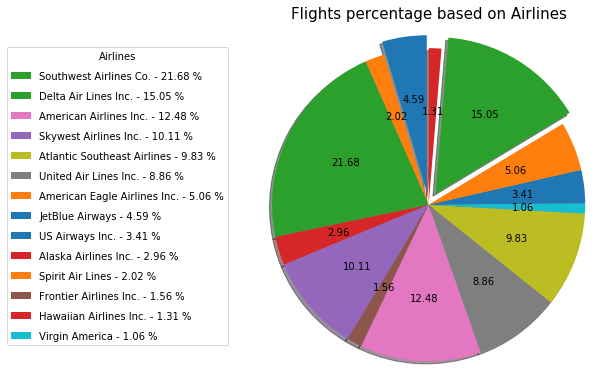

In [19]:
x = dict(flights['ORIGIN_AIRPORT'].value_counts(sort=False))
x = no_flights
no_flights = np.array(list(x))
porcent = 100.*no_flights/no_flights.sum()
explode = (0.1, 0, 0, 0, 0, 0 ,0 ,0, 0, 0, 0, 0, 0.1, 0)
fig = plt.figure(figsize = (6, 6))
patches, texts, per = plt.pie(no_flights,startangle=90, radius=1.2, autopct='%.2f', shadow = True, explode = explode)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(airline_names, porcent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, no_flights),
                                          key=lambda x: x[2],
                                          reverse=True))

_ = plt.legend(patches, labels, loc='best', bbox_to_anchor=(-0.1, 1.),fontsize=10, labelspacing=1, 
               title='Airlines')
_ = plt.title('Flights percentage based on Airlines\n', fontsize = 15)
print("Total number of flights: ", len(flights))

In [20]:
# Removing less than 1% data (Origion of Airport) 
def filter_airports_data(dictObj, number = 50000):
    newDict = dict()
    # Iterate over all the items in dictionary
    for (key, value) in dictObj.items():
        # Check if item satisfies the given condition then add to new dict
        if value > number:
            newDict[key] = value
    return newDict

In [21]:
x = dict(flights['ORIGIN_AIRPORT'].value_counts())
no_flights_by_airport = filter_airports_data(x, 50000)
print(flights.shape)
flights = flights[flights['ORIGIN_AIRPORT'].isin(list(no_flights_by_airport.keys()))]
flights.shape

(5332914, 31)


(3576291, 31)

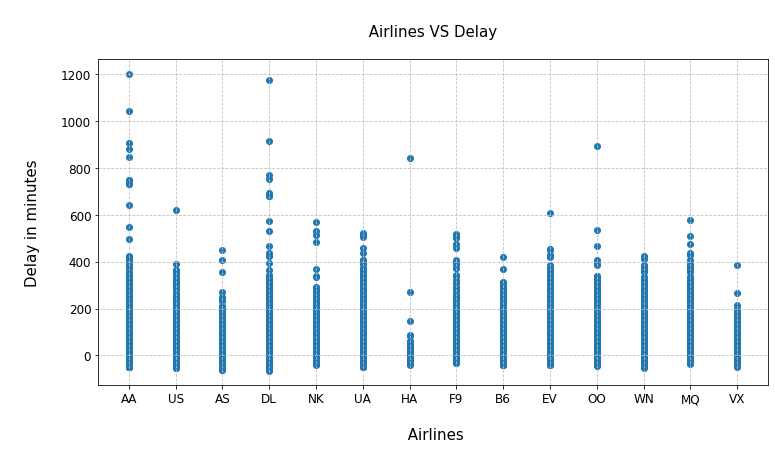

In [22]:
# Scatter plot for airline vs delay
import matplotlib.cm as cm
flights1 = flights.head(100000)
fig = plt.figure(figsize = (12, 6))
_  = plt.scatter(flights1['AIRLINE'],flights1['ARRIVAL_DELAY'])
_ = plt.tick_params(labelsize = 12)
_ = plt.title("\n Airlines VS Delay \n", fontsize = 15)
_ = plt.ylabel("\nDelay in minutes\n", fontsize = 15)
_ = plt.xlabel("\n Airlines", fontsize = 15)
plt.grid(True, linestyle='--', color = '0.75')

In [53]:
jan_data = flights[flights['MONTH'] == 1] 
abe_data = jan_data[jan_data['ORIGIN_AIRPORT'] == 'ABE']
avp_data = jan_data[jan_data['ORIGIN_AIRPORT'] == 'AVP']
eri_data = jan_data[jan_data['ORIGIN_AIRPORT'] == 'ERI']
lbe_data = jan_data[jan_data['ORIGIN_AIRPORT'] == 'LBE']
mdt_data = jan_data[jan_data['ORIGIN_AIRPORT'] == 'MDT']
phl_data = jan_data[jan_data['ORIGIN_AIRPORT'] == 'PHL']
pit_data = jan_data[jan_data['ORIGIN_AIRPORT'] == 'PIT']
sce_data = jan_data[jan_data['ORIGIN_AIRPORT'] == 'SCE']

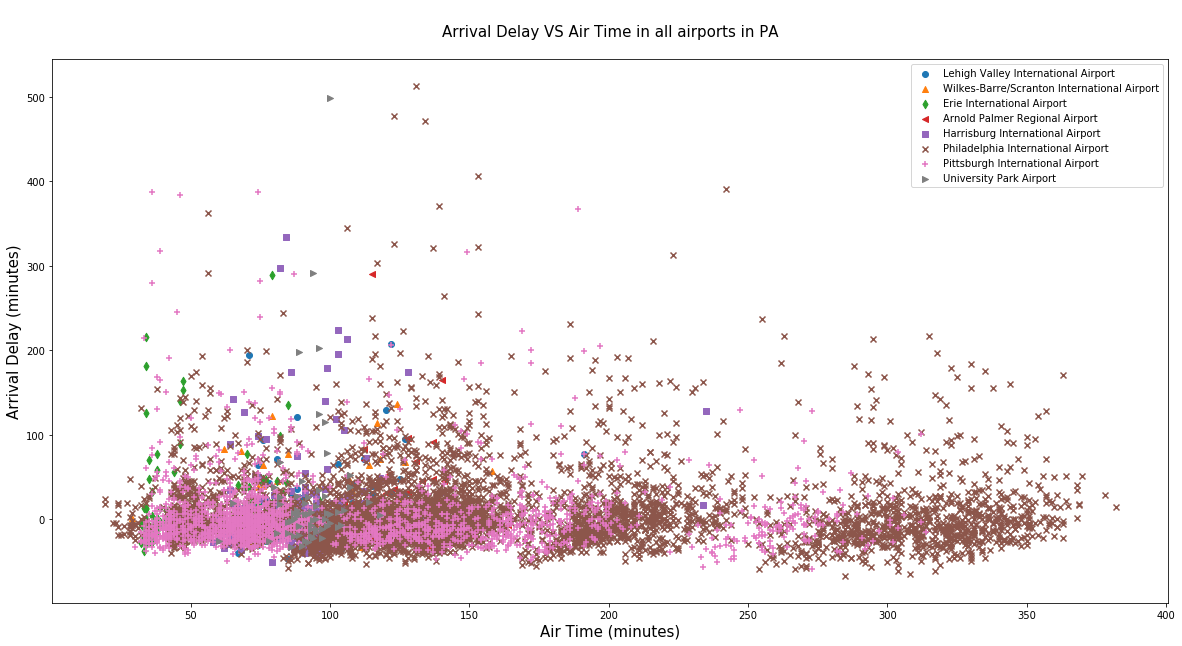

In [55]:
fig = plt.figure(figsize = (20,10))
plt.scatter(abe_data['AIR_TIME'],abe_data['ARRIVAL_DELAY'], marker = 'o', label = 'Lehigh Valley International Airport')
plt.scatter(avp_data['AIR_TIME'],avp_data['ARRIVAL_DELAY'], marker = '^', label = 'Wilkes-Barre/Scranton International Airport')
plt.scatter(eri_data['AIR_TIME'],eri_data['ARRIVAL_DELAY'], marker = 'd', label = 'Erie International Airport')
plt.scatter(lbe_data['AIR_TIME'],lbe_data['ARRIVAL_DELAY'], marker = '<', label = 'Arnold Palmer Regional Airport')
plt.scatter(mdt_data['AIR_TIME'],mdt_data['ARRIVAL_DELAY'], marker = 's', label = 'Harrisburg International Airport')
plt.scatter(phl_data['AIR_TIME'],phl_data['ARRIVAL_DELAY'], marker = 'x', label = 'Philadelphia International Airport')
plt.scatter(pit_data['AIR_TIME'],pit_data['ARRIVAL_DELAY'], marker = '+', label = 'Pittsburgh International Airport')
plt.scatter(sce_data['AIR_TIME'],sce_data['ARRIVAL_DELAY'], marker = '>', label = 'University Park Airport')
plt.ylabel("Arrival Delay (minutes)", fontsize = 15)
plt.xlabel("Air Time (minutes)", fontsize = 15)
plt.title('\nArrival Delay VS Air Time in all airports in PA\n', fontsize = 15)
plt.legend()

In [25]:
departures_ATL = flights[flights['ORIGIN_AIRPORT']== 'ATL']
arrivals_ATL = flights[flights['DESTINATION_AIRPORT']== 'ATL']
days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
no_arrivals  = [len(arrivals_ATL[arrivals_ATL['DAY_OF_WEEK'] == day])/52 for day in arrivals_ATL.DAY_OF_WEEK.unique()]
no_departures  = [len(departures_ATL[departures_ATL['DAY_OF_WEEK'] == day])/52 for day in departures_ATL.DAY_OF_WEEK.unique()]

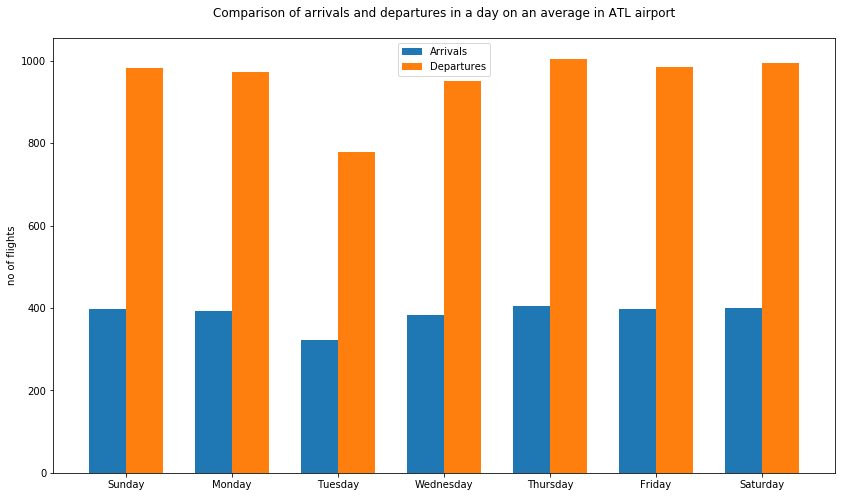

In [26]:
x = np.arange(len(days))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(14)
rects1 = ax.bar(x - width/2, no_arrivals, width, label='Arrivals')
rects2 = ax.bar(x + width/2, no_departures, width, label='Departures')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('no of flights')
ax.set_title('Comparison of arrivals and departures in a day on an average in ATL airport\n')
ax.set_xticks(x)
ax.set_xticklabels(days)
ax.legend()

In [27]:
delays = flights[['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY','LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']]

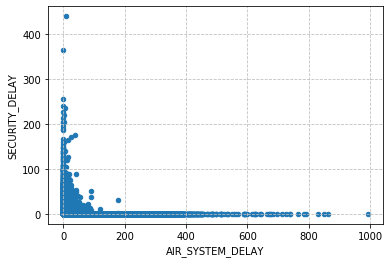

In [28]:
delays.plot(x = 'AIR_SYSTEM_DELAY', y = 'SECURITY_DELAY', kind = 'scatter')
plt.grid(True, linestyle='--', color = '0.75')

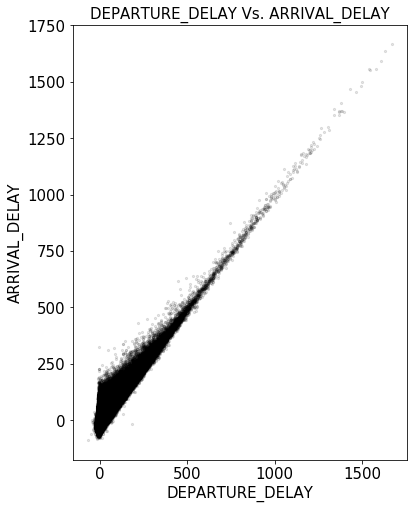

In [29]:
scat_fig = plt.figure(figsize = (6, 8))
_  = plt.scatter(flights["DEPARTURE_DELAY"], flights["ARRIVAL_DELAY"],color = "black", s = 5, alpha = 0.1)
plt.tick_params(labelsize = 15)
_ = plt.title("DEPARTURE_DELAY Vs. ARRIVAL_DELAY", fontsize = 15)
_ = plt.ylabel("ARRIVAL_DELAY", fontsize = 15)
_ = plt.xlabel("DEPARTURE_DELAY", fontsize = 15)
plt.show()

Creating a column describing whether the flight was arrived early or late or got cancelled

In [30]:
arrival_status = {-1: 'Arrived more than an 30m early',
                  0: 'Cancelled',
                  1: 'on-time',
                  2: 'Arrived 30m-5 hr late',
                  3: 'Arrived 5-10 hr late',
                  4: 'Arrived more than 10 hr late'
                 }

In [31]:
def early_late_cancelled(x):
    if x['ARRIVAL_DELAY'] < -30: #arrived more than an hour early
        return -1  
    elif x['CANCELLED'] == 1 and x['ARRIVAL_DELAY'] == None: # cancelled
        return 0
    elif -30 < x['ARRIVAL_DELAY'] <= 30 :
        return 1
    elif 30 < x['ARRIVAL_DELAY'] <= 300 : 
        return 2
    elif 300 < x['ARRIVAL_DELAY'] <= 600 :
        return 3
    elif x['ARRIVAL_DELAY'] > 600 : # Arrived 10 hr late
        return 4

In [32]:
#creating arrival ststus column
flights['ARRIVAL_STATUS'] = flights.apply(early_late_cancelled,axis = 1)

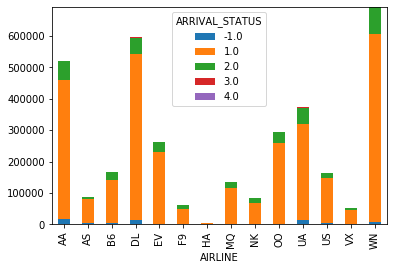

In [34]:
flights.groupby(['AIRLINE','ARRIVAL_STATUS']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

Converting categorial variables into numeric

In [35]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
flights["AIRLINE_NUM"] = lb_make.fit_transform(flights["AIRLINE"])
flights["ORIGIN_AIRPORT_NUM"] = lb_make.fit_transform(flights["ORIGIN_AIRPORT"])
flights["DESTINATION_AIRPORT_NUM"] = lb_make.fit_transform(flights["DESTINATION_AIRPORT"])
flights[["AIRLINE", "AIRLINE_NUM",'ORIGIN_AIRPORT','ORIGIN_AIRPORT_NUM','DESTINATION_AIRPORT','DESTINATION_AIRPORT_NUM']].head(5)

,AIRLINE,AIRLINE_NUM,ORIGIN_AIRPORT,ORIGIN_AIRPORT_NUM,DESTINATION_AIRPORT,DESTINATION_AIRPORT_NUM
1,AA,0,LAX,15,PBI,223
2,US,11,SFO,26,CLT,60
3,AA,0,LAX,15,MIA,193
4,AS,1,SEA,25,ANC,14
5,DL,3,SFO,26,MSP,206


In [36]:
flights = flights[['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE_NUM', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT_NUM', 'DESTINATION_AIRPORT_NUM',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED','ARRIVAL_STATUS']]
flights = flights.dropna()
flights = flights.head(100000)

Predicting whether flight is on-time or delay : 0 -delay, 1- on-time

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

In [38]:
x = flights[['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE_NUM', 'FLIGHT_NUMBER',
       'ORIGIN_AIRPORT_NUM', 'DESTINATION_AIRPORT_NUM','SCHEDULED_DEPARTURE', 'DEPARTURE_TIME',
        'DEPARTURE_DELAY', 'TAXI_OUT','WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME',
        'DISTANCE','WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL']]
## pre-processing
y = flights['ARRIVAL_STATUS']
flights['ARRIVAL_STATUS'][flights['ARRIVAL_STATUS'].isin([-1,2,3,4])] = 0
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(80000, 20)
(20000, 20)
(80000,)
(20000,)


In [39]:
#Logistic Regression
## training
Logistic_classifier = LogisticRegression(solver='lbfgs')
Logistic_classifier.fit(x_train, y_train)

## testing
LR_predictions = Logistic_classifier.predict(x_test)

print("Accuracy:" ,accuracy_score(y_test, LR_predictions))
print("Precision, recall, and F1 were:")
print(precision_score(LR_predictions, y_test))
print(recall_score(LR_predictions, y_test))
print(f1_score(LR_predictions, y_test))  
print("")

Accuracy: 0.94545
Precision, recall, and F1 were:
0.9745708429413272
0.9563768935822491
0.9653881539291267



C:\Users\npula\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [40]:
#Navie Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
GNB_predictions = gnb.fit(x_train, y_train).predict(x_test)
print("Accuracy:" ,accuracy_score(y_test, GNB_predictions))
print("Precision, recall, and F1 were:")
print(precision_score(GNB_predictions, y_test))
print(recall_score(GNB_predictions, y_test))
print(f1_score(GNB_predictions, y_test)) 

Accuracy: 0.91805
Precision, recall, and F1 were:
0.9415833973866257
0.9528748298437804
0.9471954637713843


In [41]:
#DecisionTree
from sklearn.tree import DecisionTreeRegressor
DT_regressor = DecisionTreeRegressor()
DT_regressor.fit(x_train, y_train)
# predict on a separate testing set
DT_predictions = DT_regressor.predict(x_test)
print("Accuracy:" ,accuracy_score(y_test, DT_predictions))
print("Precision, recall, and F1 were:")
print(precision_score(DT_predictions, y_test))
print(recall_score(DT_predictions, y_test))
print(f1_score(DT_predictions, y_test)) 

Accuracy: 0.94745
Precision, recall, and F1 were:
0.9659236484755317
0.9667286364510546
0.966325974816571


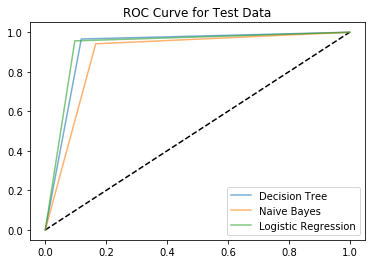

In [42]:
from sklearn.metrics import roc_curve, auc

fpr_rf, tpr_rf, _ = roc_curve(y_test, DT_predictions)
fpr_rf1, tpr_rf1, _ = roc_curve(y_test, GNB_predictions)
fpr_rf2, tpr_rf2, _ = roc_curve(LR_predictions,y_test)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='Decision Tree', alpha = 0.6)
plt.plot(fpr_rf1, tpr_rf1, label='Naive Bayes', alpha = 0.6)
plt.plot(fpr_rf2, tpr_rf2, label='Logistic Regression', alpha = 0.6)
plt.title('ROC Curve for Test Data')
plt.legend()

Predicting Arrival delay

In [43]:
flights1 = flights[['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'FLIGHT_NUMBER',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL','ARRIVAL_DELAY']]
flights1 = flights1.dropna()

In [44]:
x = flights1[['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'FLIGHT_NUMBER',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL']]
y = flights1['ARRIVAL_DELAY']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(75000, 14)
(25000, 14)
(75000,)
(25000,)


In [45]:
#Navie Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
predictions = gnb.fit(x_train, y_train).predict(x_test)
# print("Precision, recall, and F1 were:")
# print(precision_score(predictions, y_test))
# print(recall_score(predictions, y_test))
# print(f1_score(predictions, y_test))  
# print("")

In [46]:
accuracy_score(y_test, predictions, normalize=True, sample_weight=None)

0.02124

In [47]:
print("Precision Score : ",precision_score(predictions, y_test,pos_label='positive',average='micro'))
print("Recall Score : ",recall_score(predictions, y_test,pos_label='positive',average='micro'))
print("Recall Score : ",f1_score(predictions, y_test,pos_label='positive',average='micro'))

Precision Score :  0.02124
Recall Score :  0.02124
Recall Score :  0.02124


C:\Users\npula\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = [{'n_estimators': [75, 100],'max_features':[10, 20],'max_depth':[20, 30]}]
forest_reg = RandomForestRegressor(n_jobs=-1)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)

KeyboardInterrupt: 

In [ ]:
predictions = grid_search.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(predictions,y_test)